In [0]:
from google.colab import drive
drive.mount('/content/drive') #mounting drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing necessary packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

##Reading Data

In [0]:
train = pd.read_csv('/content/drive/My Drive/innomatics/maf_train[1].csv',na_values='na') #reading the train data
test = pd.read_csv('/content/drive/My Drive/innomatics/maf_test[1].csv',na_values='na') #reading the test data

In [0]:
test_c = pd.read_csv('/content/drive/My Drive/innomatics/maf_test[1].csv')

In [211]:
train.head(5) #checking the head of train data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,target
0,0,4,NaN,2.000000e+01,8.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,2504.0,2392.0,0.0,0.0,0.0,1666.0,0.0,446.0,0.0,0.0,0.0,20106.0,18030.0,10664.0,300.0,0.0,0.0,0.0,0.0,14.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1754.0,42.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,0.0,0.0,1162.0,140.0,62.0,12.0,360.0,144.0,31676.0,14.0,0.0,0.0,0.0,0.00,0.0,3500.0,1268.0,24.0,16.0,28.0,24.0,26.0,48.0,0.0,0.0,0.0,0.0,False
1,1,192902,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1036044.0,6044554.0,6243624.0,1845798.0,140682.0,2844.0,0.0,4657068.0,0.0,6502.0,NaN,303054.0,504304.0,15370854.0,14883810.0,2202728.0,642438.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2102.0,...,9869694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4749816.0,2191626.0,1539280.0,621668.0,809812.0,435744.0,650766.0,4301142.0,13692.0,0.0,NaN,NaN,False
2,2,42812,NaN,2.130706e+09,264.0,0.0,0.0,0.0,0.0,0.0,0.0,1432.0,126512.0,1981406.0,923130.0,55826.0,0.0,1335442.0,0.0,0.0,0.0,0.0,0.0,2798082.0,2478240.0,577532.0,275700.0,0.0,0.0,0.0,0.0,160.0,76.0,0.0,0.0,0.0,0.0,0.0,33210.0,1186896.0,...,2469208.0,1964.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21998.0,48806.0,16928.0,0.0,0.0,75156.0,11986.0,6138380.0,623008.0,0.0,0.0,0.0,0.0,2811960.0,869.20,908.0,664060.0,443826.0,346962.0,190796.0,447854.0,495106.0,452514.0,46858.0,326.0,0.0,0.0,0.0,False
3,3,8438,0.0,2.880000e+02,208.0,0.0,0.0,0.0,0.0,0.0,0.0,35656.0,411906.0,208880.0,5238.0,28.0,0.0,289424.0,0.0,0.0,0.0,790.0,3882.0,610196.0,506076.0,255038.0,80128.0,0.0,0.0,0.0,0.0,318.0,654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,578148.0,948.0,978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6104.0,1886.0,688.0,1902018.0,210004.0,32816.0,5180.0,2061620.0,209102.0,711970.0,10788.0,0.0,0.0,0.0,1404.42,898.0,100118.0,203862.0,93918.0,29194.0,52906.0,43192.0,28096.0,108344.0,2078.0,0.0,0.0,0.0,False
4,4,6,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2304.0,8214.0,1212.0,0.0,0.0,3098.0,0.0,0.0,0.0,0.0,0.0,10994.0,9260.0,15332.0,414.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1806.0,40.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,20.0,8.0,620.0,74.0,0.0,0.0,0.0,0.0,0.0,101.46,32.0,10526.0,1076.0,36.0,10.0,28.0,24.0,16.0,30.0,0.0,0.0,0.0,0.0,False


In [212]:
test.head(5) #checking the head of the test data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,0,21992,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5140.0,894686.0,3094446.0,3562244.0,1005258.0,46028.0,4529264.0,0.0,0.0,0.0,0.0,0.0,8110056.0,7615742.0,1096512.0,429038.0,0.0,0.0,44822.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20748.0,7752412.0,...,NaN,NaN,6322.0,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38036.0,16128.0,3366.0,0.0,0.0,125662.0,25350.0,2306440.0,794568.0,0.0,0.0,0.0,0.0,0.0,1882.26,2134.0,6777340.0,940376.0,272368.0,92340.0,145288.0,131818.0,86808.0,62154.0,96058.0,3252.0,0.0,0.0
1,1,21384,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,72938.0,895660.0,346150.0,85970.0,698.0,0.0,0.0,429242.0,0.0,0.0,NaN,73348.0,99450.0,1186318.0,1184218.0,217000.0,62682.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5642.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401894.0,92212.0,68412.0,30306.0,70896.0,80616.0,133222.0,514760.0,9098.0,0.0,NaN,NaN
2,2,2300,NaN,6.200000e+02,560.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,38786.0,92512.0,11034.0,0.0,0.0,58910.0,0.0,0.0,0.0,0.0,0.0,134150.0,119290.0,29736.0,9370.0,0.0,0.0,0.0,0.0,360.0,78.0,0.0,0.0,0.0,0.0,0.0,4342.0,102986.0,...,32.0,128740.0,182.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,912.0,924.0,438.0,0.0,0.0,3208.0,794.0,712700.0,72178.0,0.0,0.0,0.0,0.0,1299900.0,269.58,140.0,17620.0,16100.0,14516.0,9308.0,27072.0,54904.0,2942.0,112.0,0.0,0.0,0.0,0.0
3,3,40588,NaN,2.130706e+09,164.0,0.0,0.0,0.0,0.0,0.0,0.0,620.0,437006.0,1921128.0,721842.0,43640.0,0.0,1416262.0,0.0,142.0,0.0,0.0,0.0,2887006.0,2526312.0,508820.0,274142.0,0.0,0.0,0.0,0.0,576.0,146.0,0.0,0.0,0.0,0.0,0.0,211120.0,2198260.0,...,36.0,2506322.0,4432.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25564.0,36684.0,12260.0,0.0,0.0,69526.0,16226.0,7329340.0,742542.0,0.0,0.0,0.0,0.0,587100.0,1515.54,1796.0,717306.0,527364.0,411056.0,218562.0,449834.0,344838.0,231628.0,119826.0,101478.0,2344.0,0.0,0.0
4,4,5268,NaN,4.200000e+02,340.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,71336.0,131044.0,58760.0,586.0,0.0,103718.0,0.0,0.0,0.0,0.0,0.0,223636.0,171150.0,98488.0,34106.0,0.0,0.0,0.0,0.0,156.0,86.0,0.0,0.0,0.0,0.0,0.0,3404.0,257358.0,...,0.0,156342.0,608.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2570.0,440.0,146.0,0.0,0.0,5916.0,1170.0,64880.0,11510.0,138128.0,256.0,0.0,0.0,336560.0,380.70,414.0,125076.0,58518.0,13656.0,4000.0,9050.0,50890.0,754.0,22.0,2.0,0.0,0.0,0.0


In [213]:
train.columns #checking the column name of train data

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '161', '162', '163', '164', '165', '166', '167', '168', '169',
       'target'],
      dtype='object', length=172)

In [214]:
test.columns #checking the column name of test data

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '160', '161', '162', '163', '164', '165', '166', '167', '168', '169'],
      dtype='object', length=171)

##Data Cleaning, EDA and Data Transformation

In [0]:
#droping 'unamed: 0' column as it doesn't have relevant info. it's serial number.
train = train.drop('Unnamed: 0',axis=1) 
test = test.drop('Unnamed: 0',axis=1) 

In [0]:
test_c = test_c.drop('Unnamed: 0',axis=1)

In [217]:
train.head(5) #checking the head again. the data will look better now. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,target
0,4,NaN,2.000000e+01,8.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,2504.0,2392.0,0.0,0.0,0.0,1666.0,0.0,446.0,0.0,0.0,0.0,20106.0,18030.0,10664.0,300.0,0.0,0.0,0.0,0.0,14.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1754.0,42.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,0.0,0.0,1162.0,140.0,62.0,12.0,360.0,144.0,31676.0,14.0,0.0,0.0,0.0,0.00,0.0,3500.0,1268.0,24.0,16.0,28.0,24.0,26.0,48.0,0.0,0.0,0.0,0.0,False
1,192902,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1036044.0,6044554.0,6243624.0,1845798.0,140682.0,2844.0,0.0,4657068.0,0.0,6502.0,NaN,303054.0,504304.0,15370854.0,14883810.0,2202728.0,642438.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2102.0,2102014.0,...,9869694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4749816.0,2191626.0,1539280.0,621668.0,809812.0,435744.0,650766.0,4301142.0,13692.0,0.0,NaN,NaN,False
2,42812,NaN,2.130706e+09,264.0,0.0,0.0,0.0,0.0,0.0,0.0,1432.0,126512.0,1981406.0,923130.0,55826.0,0.0,1335442.0,0.0,0.0,0.0,0.0,0.0,2798082.0,2478240.0,577532.0,275700.0,0.0,0.0,0.0,0.0,160.0,76.0,0.0,0.0,0.0,0.0,0.0,33210.0,1186896.0,423270.0,...,2469208.0,1964.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21998.0,48806.0,16928.0,0.0,0.0,75156.0,11986.0,6138380.0,623008.0,0.0,0.0,0.0,0.0,2811960.0,869.20,908.0,664060.0,443826.0,346962.0,190796.0,447854.0,495106.0,452514.0,46858.0,326.0,0.0,0.0,0.0,False
3,8438,0.0,2.880000e+02,208.0,0.0,0.0,0.0,0.0,0.0,0.0,35656.0,411906.0,208880.0,5238.0,28.0,0.0,289424.0,0.0,0.0,0.0,790.0,3882.0,610196.0,506076.0,255038.0,80128.0,0.0,0.0,0.0,0.0,318.0,654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158738.0,...,578148.0,948.0,978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6104.0,1886.0,688.0,1902018.0,210004.0,32816.0,5180.0,2061620.0,209102.0,711970.0,10788.0,0.0,0.0,0.0,1404.42,898.0,100118.0,203862.0,93918.0,29194.0,52906.0,43192.0,28096.0,108344.0,2078.0,0.0,0.0,0.0,False
4,6,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2304.0,8214.0,1212.0,0.0,0.0,3098.0,0.0,0.0,0.0,0.0,0.0,10994.0,9260.0,15332.0,414.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8212.0,...,1806.0,40.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,20.0,8.0,620.0,74.0,0.0,0.0,0.0,0.0,0.0,101.46,32.0,10526.0,1076.0,36.0,10.0,28.0,24.0,16.0,30.0,0.0,0.0,0.0,0.0,False


In [218]:
print(f'train has {train.shape[0]} rows and {train.shape[1]} columns')  #checking the shape of training data
print(f'test has {test.shape[0]} rows and {test.shape[1]} columns')  #checking the shape of the testing data

train has 60000 rows and 171 columns
test has 16000 rows and 170 columns


In [219]:
train.info() #checking for the information of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, 0 to target
dtypes: bool(1), float64(169), int64(1)
memory usage: 77.9 MB


In [220]:
test.info() #checking for the inforation of test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 170 entries, 0 to 169
dtypes: float64(169), int64(1)
memory usage: 20.8 MB


In [221]:
train.apply(lambda x: x.isnull().sum())    #checking the null values

0             0
1         46329
2          3335
3         14861
4          2500
          ...  
166         671
167         671
168        2724
169        2723
target        0
Length: 171, dtype: int64

In [0]:
#dropping the columns which has more than 60% null values
def d_null(df):
  null_cols = [col for col in df.columns if df[col].isnull().sum() / df.shape[0] > 0.6]
  df.drop(null_cols,axis=1,inplace=True)

In [0]:
d_null(train)
d_null(test)

In [224]:
#et's check the shape after deleting null_cols
print(f'train has {train.shape[0]} rows and {train.shape[1]} columns')  
print(f'test has {test.shape[0]} rows and {test.shape[1]} columns')  

train has 60000 rows and 163 columns
test has 16000 rows and 162 columns


In [225]:
#looking at the target column
train['target'].value_counts()

False    59000
True      1000
Name: target, dtype: int64

In [226]:
#as we can see there is a high class imbalance
trainf = train['target'].value_counts().reset_index().rename({'index':'Values','target':'Count'},axis=1)
trainf['Shares'] = np.round(trainf['Count']/trainf['Count'].sum(),6)
trainf

,Values,Count,Shares
0,False,59000,0.983333
1,True,1000,0.016667


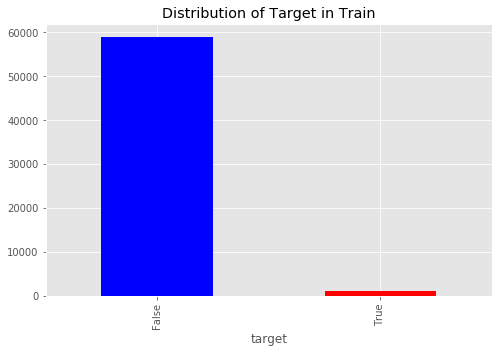

In [227]:
#let's plot the distribution of target variable
train.groupby('target')['target'].count().plot(kind='bar',
          title='Distribution of Target in Train',color=('b','r'),                           
          figsize=(8, 5))
plt.show()

In [0]:
#From above graph it is evidient that the dataset has high class imbalance
#98.3% has 'False' class whereas only 1.6% has True class. 

In [229]:
train.describe()  #descritive statistics of train date

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
count,6.000000e+04,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.935500e+04,5.937100e+04,5.937100e+04,5.560000e+04,5.935800e+04,5.937100e+04,5.935800e+04,5.941100e+04,5.935800e+04,5.941100e+04,57277.000000,5.937100e+04,5.937100e+04,5.937100e+04,57500.000000,57499.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,46192.000000,4.619200e+04,57497.000000,57276.000000,5.599200e+04,5.599200e+04,5.599200e+04,5.599400e+04,55993.000000,5.599300e+04,5.599200e+04,5.599100e+04,5.930900e+04,5.727600e+04,57274.000000,5.727400e+04,5.727400e+04,5.727300e+04,57273.000000,5.727400e+04,5.727400e+04,5.727700e+04,5.727600e+04,57277.000000,57277.000000,5.599300e+04,49761.000000,50447.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,1.108374e+06,1.657818e+06,4.993098e+05,3.556989e+04,5.114753e+03,1.809931e+06,9.016965e+03,1.143675e+03,9.794900e+02,5.913048e+04,9.328133e+04,3.461037e+06,3.002440e+06,1.004160e+06,4.424045e+05,0.496918,1.267365e+02,5.072046e+03,2.305804e+02,1117.825913,374.327380,1.221165e+04,1.019012e+04,1.097500e+04,7.225784e+03,1.056600e+04,1.119791e+05,1.078551e+06,1.546032e+06,1.051123e+06,...,13.416652,2.200752e+06,3123.961911,375.147112,2.718638e+03,5.609957e+03,4.707073e+03,3.724824e+04,39.938564,1.861313e+03,2.854177e+04,7.923228e+03,3.374545e+04,2.850785e+04,6958.652722,4.529375e+06,2.037598e+05,8.965500e+04,15403.354670,4.058712e+06,5.938350e+05,7.912085e+05,7.780350e+03,0.215759,1.567750,9.717093e+06,1353.131452,1452.155212,7.334042e+05,7.838746e+05,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,2.374282e+06,3.262607e+06,3.909384e+06,1.422765e+06,2.201524e+05,1.696582e+05,4.185740e+06,1.632778e+05,5.035971e+04,7.583162e+04,5.394658e+05,8.494694e+05,7.790350e+06,6.819518e+06,3.088457e+06,1.262469e+06,5.511653,1.101004e+04,1.196159e+05,1.579952e+04,6598.611557,1482.711621,4.544963e+05,5.352707e+05,4.283370e+05,2.064679e+05,3.546258e+05,1.394585e+06,3.278941e+06,5.106177e+06,3.991050e+06,...,73.405610,4.110150e+06,9516.675102,1689.062059,1.373331e+05,2.085649e+05,5.602799e+05,4.254382e+05,4533.142182,6.659786e+04,1.095662e+06,2.775356e+05,9.733719e+04,6.125476e+04,13955.451781,9.748478e+07,1.366065e+06,2.082016e+05,33801.022975,1.156777e+07,2.082998e+06,4.151033e+06,5.924449e+04,10.821035,53.528722,4.274675e+07,3536.637285,3525.028652,2.416166e+06,2.570111e+06,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0

In [0]:
#from above stastics it is evident that the datset has outiers.
#mean won't be a best statistic to impute null values.

In [0]:
#imputing missing values using medi

In [0]:
def fill_val(df):
  for i in df.columns:
    df[i].fillna(df[i].median(),inplace=True)

In [0]:
fill_val(train)
fill_val(test)

##Data Transformation

In [0]:
#label encoding data
le = LabelEncoder()
train['target'] = le.fit_transform(train['target'])

In [0]:
y = train['target']

In [0]:
x = train.drop('target',axis=1)

In [0]:
#Standardization
sc=StandardScaler()
X_ =sc.fit_transform(x)
test = sc.fit_transform(test)

In [238]:
print(X_)

[[-0.40798302 -0.43285892 -0.00409275 ... -0.1756986  -0.02025676
  -0.02353972]
 [ 0.9184251  -0.43285875 -0.00408938 ... -0.1756986  -0.02025676
  -0.02353972]
 [-0.11362601  2.31022414 -0.00408545 ... -0.1756986  -0.02025676
  -0.02353972]
 ...
 [-0.40801053 -0.43285895 -0.00408938 ... -0.1756986  -0.02025676
  -0.02353972]
 [ 0.14344816 -0.43285771 -0.00406696 ... -0.1756986  -0.02025676
  -0.02353972]
 [-0.40791426 -0.43285891 -0.00409235 ... -0.1756986  -0.02025676
  -0.02353972]]


In [0]:
#Applying Pca for dimensionality reduction and checking explained variance ratio sum
abc=[]
from sklearn.decomposition import PCA
for i in range(1,55):
  pca = PCA(n_components = i)
  pca.fit(X_)
  abc.append(pca.explained_variance_ratio_.sum())

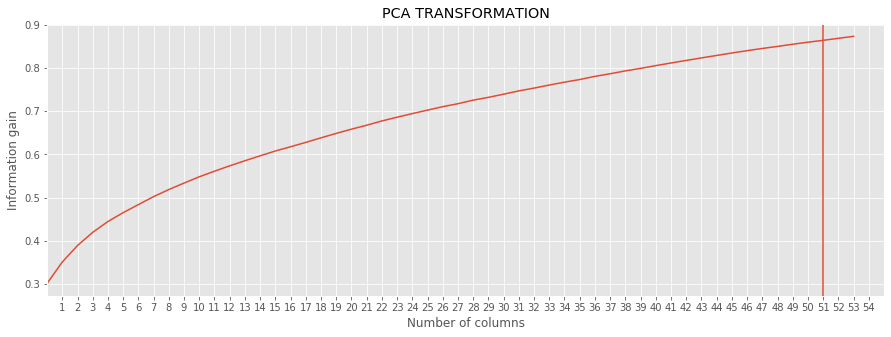

In [240]:
#visuaizing to get the number of dimensions from which we can get more than 85% of information
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(15,5))
plt.plot(abc)
plt.axvline(x=51)
plt.xlim(0,55)
plt.xticks(range(1,55))
plt.title('PCA TRANSFORMATION')
plt.xlabel('Number of columns')
plt.ylabel('Information gain')
plt.show()

In [241]:
#fitting and tranforming data with 43 components
pca = PCA(n_components = 51)
pca.fit(X_)

PCA(copy=True, iterated_power='auto', n_components=51, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [242]:
pca.explained_variance_ratio_.sum()

0.859641474817589

In [0]:
x_train=pca.transform(X_)

In [0]:
test=pca.fit_transform(test)

In [0]:
#splitting the dataset in train and test
x_train,x_test,y_train,y_test = train_test_split(x_train,y,stratify = y,test_size = 0.3, random_state=1)

In [246]:
print('Number of  false cases in entire dataset',len(train[train['target']==0]))
print('Number of true cases in entire dataset',len(train[train['target']==1]))

Number of  false cases in entire dataset 59000
Number of true cases in entire dataset 1000


In [247]:
print('Number of false cases in training ',len(y_train[y_train == 0]))
print('Number of true cases in training ',len(y_train[y_train == 1]))

Number of false cases in training  41300
Number of true cases in training  700


In [248]:
print('Number of false cases in test dataset ',len(y_test[y_test == 0]))
print('Number of true cases in test dataset',len(y_test[y_test == 1]))

Number of false cases in test dataset  17700
Number of true cases in test dataset 300


In [249]:
(len(y_train[y_train == 0]))/(len(y_train[y_train == 0])+len(y_train[y_train == 1])),(len(y_train[y_train == 1]))/(len(y_train[y_train == 0])+len(y_train[y_train == 1]))

(0.9833333333333333, 0.016666666666666666)

In [250]:
(len(y_test[y_test == 0]))/(len(y_test[y_test == 0])+len(y_test[y_test == 1])),(len(y_test[y_test == 1]))/(len(y_test[y_test == 0])+len(y_test[y_test == 1]))

(0.9833333333333333, 0.016666666666666666)

##Logistic regression

In [251]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)                        #fitting the logistic regression on training set
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predict = model.predict(x_test)  #predicting the class of test labels

In [253]:
predict

array([0, 0, 0, ..., 0, 0, 0])

In [254]:
model.score(x_train,y_train)      #checking the accuracy score for training

0.9901428571428571

In [255]:
model.score(x_test,y_test)        #checking the accuracy score for testing

0.9889444444444444

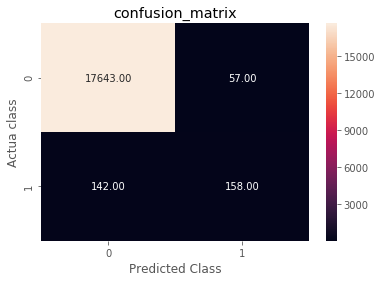

In [256]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Predicted Class')
plt.ylabel('Actua class')
plt.show()

In [257]:
#checking recall
conf = np.array(confusion_matrix(y_test,predict))
fn = conf[1,0]
tp = conf[1,1]
recall = tp/(tp+fn)
print(recall)

0.5266666666666666


##Decision tree

In [258]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)  #building model with decision tree
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [0]:
predict = model.predict(x_test) #making prediction

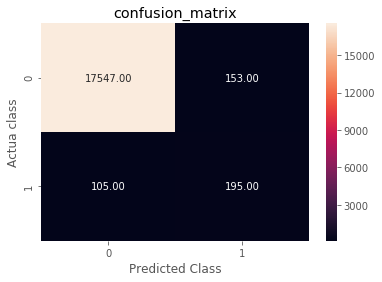

In [260]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Predicted Class')
plt.ylabel('Actua class')
plt.show()

In [261]:
model.score(x_test,predict) #checking accuracy score

1.0

In [262]:
#checking recall
conf = np.array(confusion_matrix(y_test,predict))
fn = conf[1,0]
tp = conf[1,1]
recall = tp/(tp+fn)
print(recall)

0.65


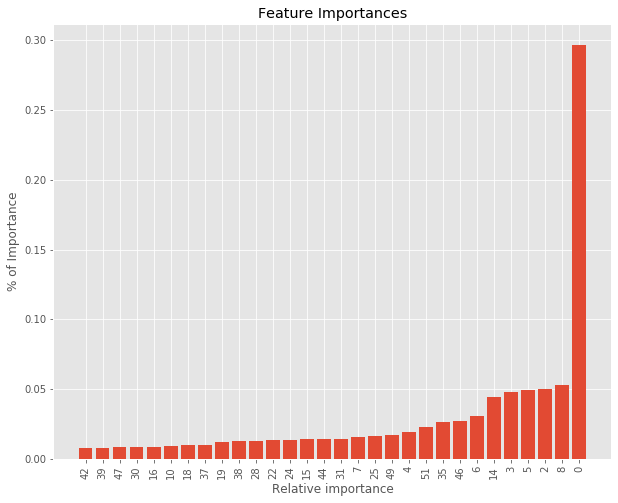

In [263]:
#checking for feature importance
features = train.columns
importances = model.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.ylabel('% of Importance')
plt.xticks(rotation=90)
plt.show()

##Random forest

In [264]:
from sklearn.ensemble import RandomForestClassifier #importing the RandomForestClassifier library for our decision tree classifier
model = RandomForestClassifier(n_estimators=500,random_state=1)    #creating the instance of classifier with 500 trees
model.fit(x_train,y_train)                          #fitting our model on training data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
predict = model.predict(x_test)

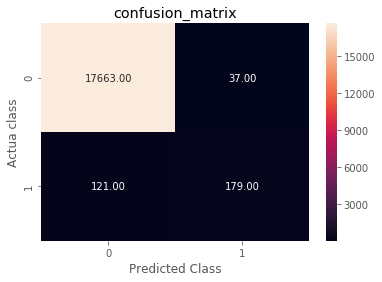

In [266]:
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Predicted Class')
plt.ylabel('Actua class')
plt.show()

In [267]:
model.score(x_test,predict)

1.0

In [268]:
conf = np.array(confusion_matrix(y_test,predict))
fn = conf[1,0]
tp = conf[1,1]
recall = tp/(tp+fn)
print(recall)

0.5966666666666667


##AdaBoost

In [0]:
#preparing decision tree as  base model for AdaBoost
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train,y_train)
predict = model.predict(x_test)

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
#checking accuracy with different estimators
acc = []
for i in np.arange(50,200,step=50):
  classifier = AdaBoostClassifier(
      model,
      n_estimators= i 
  )
  classifier.fit(x_train, y_train)
  predict=classifier.predict(x_test)
  acc.append(classifier.score(x_test,y_test))
  

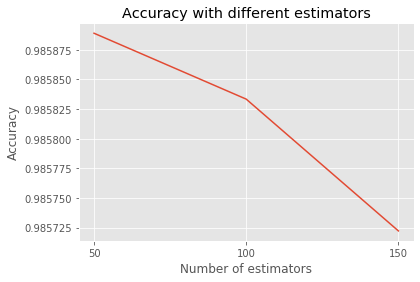

In [272]:
#plotting acc. with different  estimators
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.xticks(np.arange(0,9,step=1),np.arange(50,200,step=50))
plt.title('Accuracy with different estimators')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.plot(acc)
plt.show()

In [0]:
classifier = AdaBoostClassifier( model,n_estimators=100,random_state=1) #applying adaboost classifier
classifier.fit(x_train, y_train)
predict=classifier.predict(x_test)

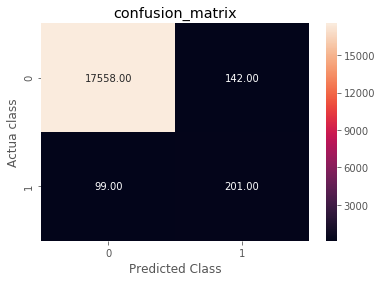

In [274]:
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Predicted Class')
plt.ylabel('Actua class')
plt.show()

In [275]:
model.score(x_test,predict)

0.9961666666666666

In [276]:
conf = np.array(confusion_matrix(y_test,predict))
fn = conf[1,0]
tp = conf[1,1]
recall = tp/(tp+fn)
print(recall)

0.67


##lgbm

In [0]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train,label=y_train)
params={}
params['task'] = 'train'                        #lgbm with different parameters
params['boosting_type'] = "gbdt"
params['application'] = 'classification'
params['objective'] = 'binary'
params['metric'] = 'recall'
params['random_state'] = 1
model = lgb.train(params, d_train, 5000) 

In [0]:
predict = model.predict(x_test)     #predicting test labels

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [280]:
predict = model.predict(x_test)
ROC=[]
ACC = []
for j in np.arange(0.1,0.99,step=.05):
  predict2=np.array(list(predict))
  for i in range(len(y_test)):
    if predict[i]>=j:
      predict2[i]=1               #checking auc and accuracy with different thresholds between 0 an 1
    else:
      predict2[i]=0
  ROC.append(roc_auc_score(predict2,y_test))
  conf = confusion_matrix(predict2,y_test)
  ACC.append((conf[0,0]+conf[1,1]) / len(y_test))
  #print(len(predict2[predict2 == 0]))
print(ROC)
print(ACC)

[0.8716984156184789, 0.877895852344647, 0.8806730350320491, 0.8840227740506148, 0.8909144832899627, 0.8935044662214898, 0.8965757249254823, 0.8988699682572362, 0.9036877982838633, 0.9028654363890849, 0.9062189640520534, 0.9075168918918919, 0.9101801777733676, 0.9107539319039264, 0.9150190543809144, 0.9230338559246377, 0.9272495178600868, 0.937099275004024]
[0.9912222222222222, 0.9913333333333333, 0.9914444444444445, 0.9915, 0.9917222222222222, 0.9917777777777778, 0.9918888888888889, 0.9918888888888889, 0.9918888888888889, 0.9917777777777778, 0.9918888888888889, 0.9918888888888889, 0.9918888888888889, 0.9917777777777778, 0.9917777777777778, 0.9918333333333333, 0.9917222222222222, 0.9915555555555555]


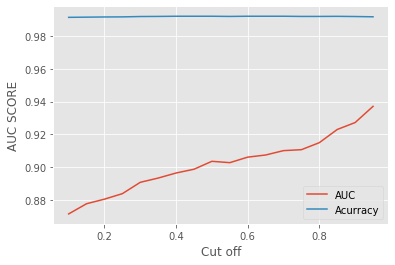

In [281]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.ylabel('AUC SCORE')           #plotting auc and roc with different thresholds points
plt.xlabel('Cut off')
plt.plot(np.arange(0.1,0.99,step=.05),ROC,label='AUC')
plt.plot(np.arange(0.1,0.99,step=.05),ACC,label='Acurracy')
plt.legend()
plt.show()

In [0]:
predict3 = np.array(list(predict))
for i in range(len(y_test)):
  if predict[i]>=0.2:            #setting the threshold at 0.5
    predict3[i]=1
  else:
    predict3[i]=0

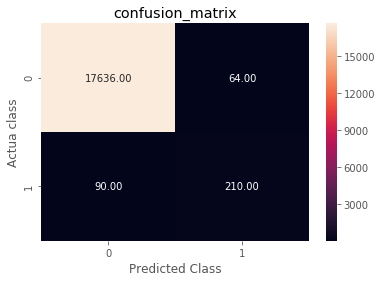

In [283]:
cm = confusion_matrix(y_test,predict3)
sns.heatmap(cm,annot=True,fmt='.2f')
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Predicted Class')
plt.ylabel('Actua class')
plt.show()

In [284]:
conf = np.array(confusion_matrix(y_test,predict3))
fn = conf[1,0]
tp = conf[1,1]
recall = tp/(tp+fn)
print(recall)

0.7


In [285]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17700
           1       0.77      0.70      0.73       300

    accuracy                           0.99     18000
   macro avg       0.88      0.85      0.86     18000
weighted avg       0.99      0.99      0.99     18000



In [0]:
#as we can see lgbm outperforms everyother model
#we will use lgbm on our test data

In [0]:
test_predict = model.predict(test)

In [0]:
for i in range(len(test)):
  if test_predict[i]>=0.2:            #setting the threshold at 0.2
    test_predict[i]=1
  else:
    test_predict[i]=0

In [0]:
submission['target'] = pd.DataFrame(test_predict)

In [0]:
submission.to_csv('data.csv')
!cp data.csv 'drive/My Drive/'